# 目标：

该数据集来自南斯拉夫卢布尔雅那大学医疗中心肿瘤研究所，其特征是从乳腺肿块的细针抽吸物（FNA）的数字化图像中计算出来的。它们描述了图像中细胞核的特征，是一个常用的标准数据集。本次分析数据将用来预测癌症是良性还是恶性。而我在这次数据分析中，使用的是人工神经网络（ANN）算法，接下来就着此目标来展示代码。

### 什么是深度学习？

首先先了解机器学习。机器学习是一种人工智能领域的分支，旨在使计算机系统能够自动从数据中学习和提高性能，而不需要明确的编程。简而言之，机器学习是利用经验来训练计算机系统，使其能够从输入数据中提取规律，并对新数据进行预测或分类。
而深度学习是机器学习的一个分支，它利用多层神经网络来处理复杂的数据和任务。深度学习中的神经网络由许多节点和层组成，每个节点都会接收一些输入，并计算出相应的输出。通过不断地调整网络参数，深度学习可以自动发现数据中的复杂模式，并产生高质量的预测或分类结果。

![difference](./difference.png)

#### 特征抽取：

机器学习：人工抽取特征的过程
深度学习：自动的进行特征抽取

#### 数据量：

机器学习：数据量少，效果不是特别好
深度学习：数据量大，效果更好

#### 应用场景：

深度学习：图像识别（物体识别、场景识别、人脸检测跟踪、人脸身份认证）、自然语言处理（机器翻译、文本识别、聊天对话）、语音识别

#### 常见的深度学习框架：

目前企业中常见的深度学习框架有很多：Tensorflow、Caffe2、Keras、Theano、PyTorch、Chainer、DyNet and CNTK等等。

### 什么是人工神经网络？

人工神经网络（Artificial Neural Network，ANN）是一种模仿生物神经网络的结构和功能的数学模型，用于对函数进行估计和近似。和其他机器学习方法一样，神经网络已经被用于解决各种各样的问题，例如机器视觉和语音识别。神经网络中的基础单元，相互连接，组成神经网络。多层神经网络就是由单层神经网络进行叠加之后得到的，所以就形成了层的概念，常见的多层神经网络有如下结构：
输入层（Input layer），众多神经元接受大量输入消息。输入的消息称为输入向量。
输出层（Output layer），消息在神经元链接中传输、分析、权衡，形成输出结果，输出的消息称为输出向量。
隐藏层（Hidden layer），是输入层和输出层之间众多神经元和链接组成的各个层面，隐层可以有一层或多层，隐层的节点数目不定，但数目越多神经网络的非线性越显著，从而神经网络的强健性更显著。
示意图如下：

![networks](./networks.png)

全连接层
第N层和第N-1层每个神经元相互连接，我们成为当前这一层为全连接层。
所谓的全连接层就是在前一层输出的基础上进行一次Y=Wx+b的变化（不考虑激活函数的情况下就是一次线性变化，所谓线性变化就是平移（+b）和缩放（*W）的组合）

### 人工神经网络的运行原理：

第一步，我们要预先设定一种网络结构和激活函数， 这一步其实很困难，因为网络结构可以无限拓展，要知道什么样的结构才符合我们的问题需要做大量的试验。
第二步，初始化模型中的权重。 模型中的每一个连接都会有一个权重，在初始化的时候可以都随机给予一个值。
第三步，就是根据输入数据和权重来预测结果。 由于最开始的参数都是随机设置的，所以获得的结果肯定与真实的结果差距比较大，所以在这里要计算一个误差，误差反映了预测结果和真实结果的差距有多大。
最后一步，模型要调节权重 。这里我们可以参与的就是需要设置一个 “学习率”，这个学习率是针对误差的，每次获得误差后，连接上的权重都会按照误差的这个比率来进行调整，从而期望在下次计算时获得一个较小的误差。经过若干次循环这个过程，我们可以选择达到一个比较低的损失值的时候停止并输出模型，也可以选择一个确定的循环轮次来结束。

# 代码：

### 导入库

In [73]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

### 浏览数据集

In [74]:
df = pd.read_csv('data.csv')
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
236,88299702,M,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,...,34.51,206.00,2944.0,0.1481,0.4126,0.58200,0.25930,0.3103,0.08677,NaN
211,8810528,B,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,...,24.99,85.22,546.3,0.1280,0.1880,0.14710,0.06913,0.2535,0.07993,NaN
40,855167,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146,NaN
90,861648,B,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,...,29.11,102.90,803.7,0.1115,0.1766,0.09189,0.06946,0.2522,0.07246,NaN
248,88466802,B,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,NaN


### 了解数据的概况，从而更好地进行后续的数据处理和分析。

属性信息：
(a) radius (mean of distances from center to points on the perimeter)
(b) texture (standard deviation of gray-scale values)
(c) perimeter
(d) area
(e) smoothness (local variation in radius lengths)
(f) compactness (perimeter^2 / area - 1.0)
(g) concavity (severity of concave portions of the contour)
(h) concave points (number of concave portions of the contour)
(i) symmetry
(j) fractal dimension ("coastline approximation" - 1)
The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.
所有特征值都用四位有效数字重新编码。
缺少属性值：无
类别分布：良性357种，恶性212种

In [75]:
#每一列的数据类型、非空值的数量、内存占用等信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [76]:
#快速查看数据的统计摘要，可以帮助我们快速了解数据的分布情况。
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### 准备数据集，将数据集分为特征集和标签集，并对标签集进行统计

In [77]:
#删除名为id和Unnamed: 32的两列
df.drop(['id','Unnamed: 32'], inplace= True, axis = 1)

In [78]:
#创建一个新的x，用作模型的特征集
x = df.drop('diagnosis', axis =1)
#将diagnosis列提取出来，并将其赋值给变量 y。这个Series对象将用作模型的标签集或目标变量。
y = df['diagnosis']

In [79]:
#计算diagnosis列中各个值的频数
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### 准备数据、构建模型、配置模型，并打印模型的摘要信息，调用模型训练

In [80]:
scaler = MinMaxScaler() 
#对特征数据x进行缩放，并计算缩放比例，这些比例用于将数据缩放回原始范围。
x = scaler.fit_transform(x)

In [81]:
encoder = LabelEncoder()
#对目标变量y进行编码，将分类标签转换为整数编码。
y = encoder.fit_transform(y)

In [82]:
#使用train_test_split函数将数据分为训练集和测试集。test_size=0.1表示测试集占数据集的10%，shuffle=True表示在分割前进行随机打乱，random_state=33表示使用固定的随机数种子以确保结果的可重复性。
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=33)

创建一个Sequential模型，这是一个顺序堆叠层的方式构建神经网络的模型。这里定义了一个简单的全连接神经网络，包含三个Dense层，其中第一个层有16个神经元，第二个层有8个神经元，最后一个层有1个神经元，并且使用了ReLU激活函数和Sigmoid激活函数。

In [83]:
model = Sequential([
    Dense(16, activation='relu', input_dim=30),
    
    Dense(8, activation='relu'),
    
    Dense(1, activation='sigmoid')
])
#使用Adam优化器，二进制交叉熵作为损失函数，以及准确率作为评估指标
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#打印模型的摘要信息，包括层数、每个层的神经元数量、输入形状、输出形状以及模型的总参数数量。
model.summary()

D:\python\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

调用fit方法训练模型。参数解释：
X_train：训练集的特征数据，
y_train：训练集的目标数据，
epochs=200：训练的轮数，即模型会重复训练数据200次。
validation_split=0.2：用于验证集的分割比例，即从训练集中随机选择20%的数据作为验证集。运行此行时，Keras将执行以下操作：
初始化模型的权重。
重复以下步骤200次：
计算每个样本的预测值。
计算损失。
使用优化器更新权重。
计算验证集的预测值和损失。
存储训练和验证的损失值、准确率等信息。
返回一个包含训练和验证损失值、准确率等信息的字典。
返回的history字典包含了一系列关于训练和验证损失值、准确率等信息，可以使用这些信息来绘制学习曲线，了解模型的训练过程。

In [84]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6034 - loss: 0.7322 - val_accuracy: 0.6019 - val_loss: 0.7136
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 0.7147 - val_accuracy: 0.6214 - val_loss: 0.6778
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - loss: 0.6695 - val_accuracy: 0.6019 - val_loss: 0.6476
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - loss: 0.6400 - val_accuracy: 0.6408 - val_loss: 0.6279
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.6190 - val_accuracy: 0.7282 - val_loss: 0.6009
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - loss: 0.5954 - val_accuracy: 0.7573 - val_loss: 0.5744
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.5606 - val_accuracy: 0.7961 - val_loss: 0.5452
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.5487 - val_accuracy: 0.8155 - 

### 可视化图形分析并计算预测

创建一个包含两个子图的图形窗口，一个用于显示训练和验证损失曲线，另一个用于显示训练和验证准确率曲线。这有助于可视化模型在训练过程中的表现，用于了解模型是否在过拟合或欠拟合。

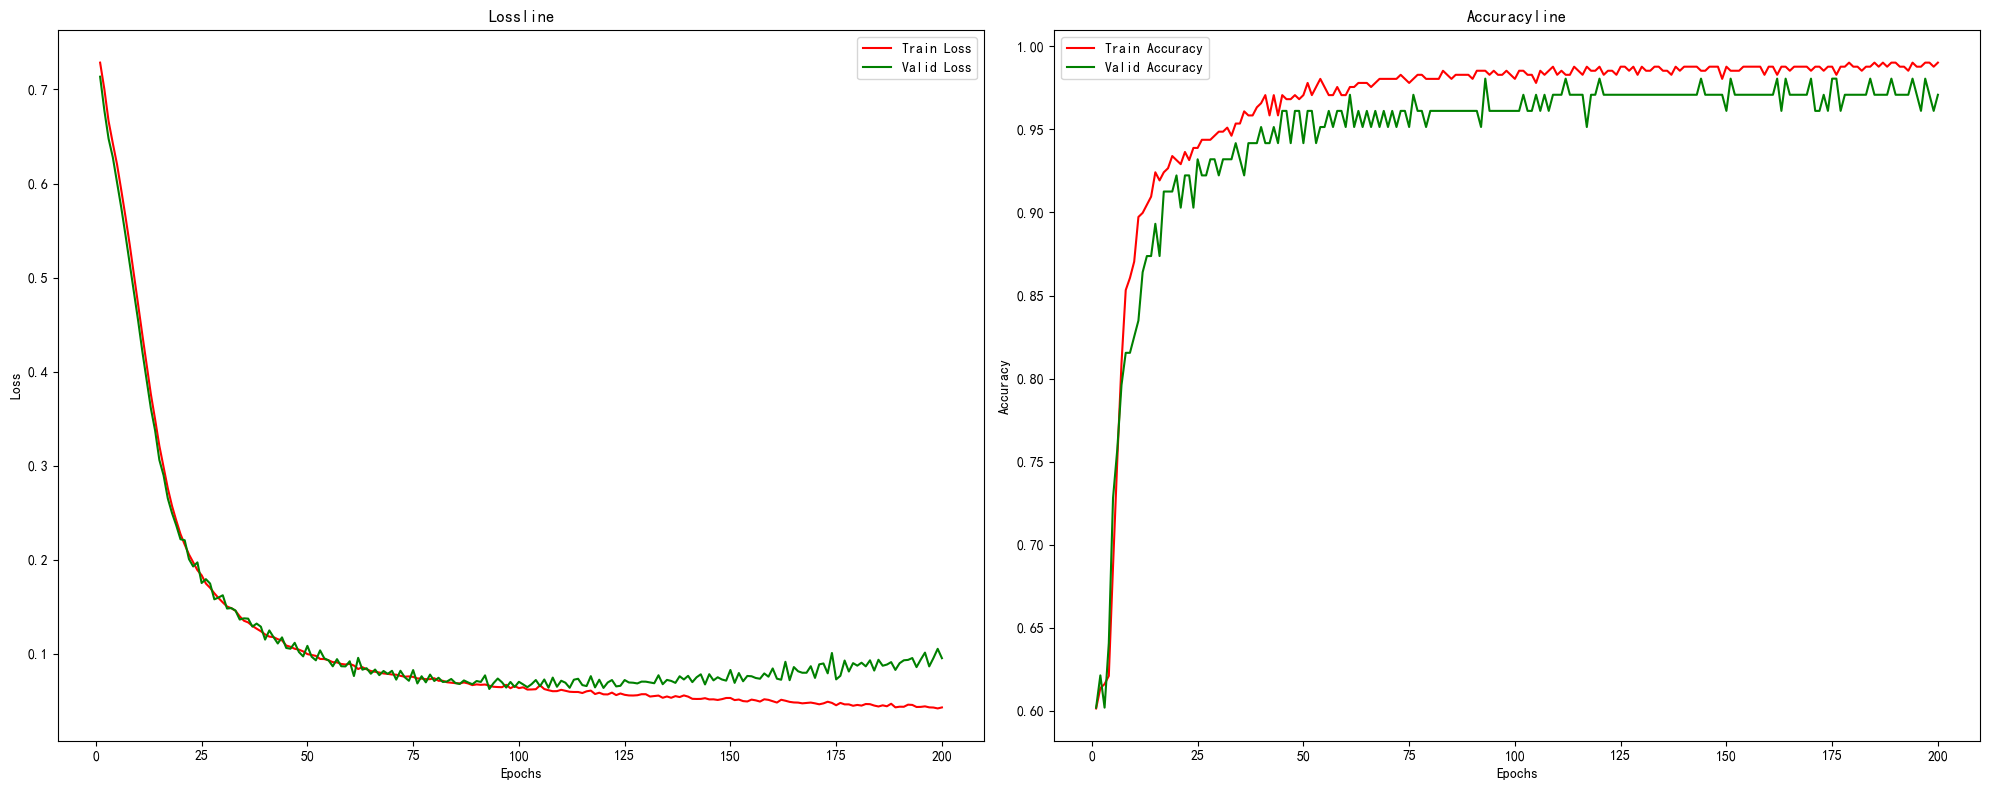

In [85]:
tr_acc = history.history['accuracy']#提取训练集的准确率数据
tr_loss = history.history['loss']#提取训练集的损失数据
val_acc = history.history['val_accuracy']#提取验证集的准确率数据
val_loss = history.history['val_loss']#提取验证集的损失数据
epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)#创建第一个子图
plt.plot(epochs, tr_loss, 'r', label='Train Loss')#在第一个子图中绘制训练损失曲线，使用红色线表示
plt.plot(epochs, val_loss, 'g', label='Valid Loss')#第一个子图中绘制验证损失曲线，使用绿色线表示
plt.title('Lossline')
plt.legend()
plt.xlabel('Epochs')#x轴标签
plt.ylabel('Loss')#y轴标签

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')#第二个子图中绘制训练准确率曲线，使用红色线表示
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')#在第二个子图中绘制验证准确率曲线，使用绿色线表示
plt.title('Accuracyline')
plt.legend()
plt.xlabel('Epochs')#x轴标签
plt.ylabel('Accuracy')#y轴标签

plt.tight_layout()
plt.show()

使用模型对测试集进行预测，并将预测结果转换为二进制形式

In [86]:
#predict方法返回一个数组，其中包含了模型对每个测试样本的预测结果。
y_pred = model.predict(X_test)
#如果预测值大于0.5，则预测为1（恶性）；如果预测值小于或等于0.5，则预测为0（良性）。
y_pred = (y_pred > 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


计算混淆矩阵，这是评估分类模型性能的一种方法。混淆矩阵是一个矩阵，其中包含模型预测和实际类别之间的比较结果。

In [87]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[44,  0],
       [ 1, 12]], dtype=int64)

In [88]:
print("准确率为 {}%".format(((cm[0][0] + cm[1][1])/57)*100))

准确率为 98.24561403508771%


Text(0.5, 1.0, 'Confusion Matrix')

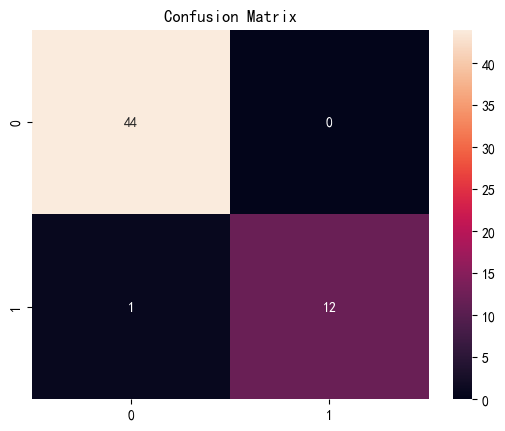

In [89]:
#混淆矩阵通常以如下形式呈现：
#                  预测正例     预测负例
#实际正例（真正例）    TP          FN
#实际负例（真负例）    FP          TN
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')#可视化矩阵

对以上混淆矩阵分析可看出，模型在实际为良性下，预测为良性的准确率为44/44=1，即模型完全正确预测了所有实际为良性的样本；而在实际为恶性下，预测为恶性的准确率是12/13=0.9231，可看出该模型预测效果较佳。

In [90]:
#将训练好的模型保存到文件系统中，方便随时重新加载模型，而不需要重新训练
model.save('model.keras')